In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [237]:
import warnings
warnings.filterwarnings('ignore')

In [191]:
df=pd.read_csv('income_evaluation.csv')

In [192]:
pd.set_option('display.max_columns', None)

In [193]:
df.isnull().any()

age                False
 workclass         False
 fnlwgt            False
 education         False
 education-num     False
 marital-status    False
 occupation        False
 relationship      False
 race              False
 sex               False
 capital-gain      False
 capital-loss      False
 hours-per-week    False
 native-country    False
 income            False
dtype: bool

# Checking Categorical columns

In [194]:
for col in df.dtypes[df.dtypes == object].index:
    print('Unique items in column',col,'are:',df[col].unique())
    print('-'*90)

Unique items in column  workclass are: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
---------------------------------------------------------------------------
Unique items in column  education are: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
---------------------------------------------------------------------------
Unique items in column  marital-status are: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
---------------------------------------------------------------------------
Unique items in column  occupation are: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-i

In [195]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [206]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [197]:
# Removing Spaces from the begining of the column name
df = df.rename(columns={'age': 'age',
                         ' workclass': 'workclass',
                         ' fnlwgt': 'final_weight',
                         ' education': 'education',
                         ' education-num': 'education_num',
                         ' marital-status': 'marital_status',
                         ' occupation': 'occupation',
                         ' relationship': 'relationship',
                         ' race': 'race',
                         ' sex': 'sex',
                         ' capital-gain': 'capital_gain',
                         ' capital-loss': 'capital_loss',
                         ' hours-per-week': 'hrs_per_week',
                         ' native-country': 'native_country',
                         ' income': 'income'
                        })

# Catogorical to Numerical

In [229]:
def Cat2Num(dff):
    df1=dff.copy()
    
    cat_col=[col for col in df1.columns if df1[col].dtype=='O']
    print(cat_col)
    num_col=list(set(df1.columns)-set(cat_col))
    cat_ord=['workclass','education'] #Ordinal category
    cat_nom=list(set(cat_col)-set(cat_ord)) #Nominal category
    cat_nom=list(set(cat_nom)-set(['income']))
    
    # Further classify nominal as having low or high cardinality
    low_cardinality_nom = [col for col in cat_nom if df1[col].nunique()<10]
    high_cardinality_nom = list(set(cat_nom)-set(low_cardinality_nom))
    
    #Ordinal & High Cardinality 'Label Encoder' otherwise OneHotEncoder
    col_LE=col_ord+high_cardinality_nom
    print(col_LE)
    col_OHE=list(set(cat_col)-set(col_LE))
    df_LE=df1[col_LE].copy()
    df_num=df1[num_col].copy()
    Encoders={}
    for col in col_LE:
        Encoders['L_enc_'+str(col)]=LabelEncoder()
        df_LE[col]=Encoders['L_enc_'+str(col)].fit_transform(df1[col])
    
    Encoders['OH_enc_']=OneHotEncoder(handle_unknown='ignore', sparse=False)
    dataset=pd.DataFrame(Encoders['OH_enc_'].fit_transform(df1[col_OHE]))
    dataset.index=df1.index
    dataset.columns=Encoders['OH_enc_'].get_feature_names(df1[col_OHE].columns.tolist())
    
    df_final = (pd.concat([df_num,dataset,df_LE],axis=1))
    
    return df_final,Encoders
    
    

In [230]:
y=df['income'].apply(lambda x:0 if x==' <=50K' else 1)
X=df.drop(['income'],axis=1)
X,Encoders=Cat2Num(X)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
['workclass', 'education', 'occupation', 'native_country']


In [231]:
y.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     1
9     1
10    1
11    1
12    0
13    0
14    1
15    0
16    0
17    0
18    0
19    1
Name: income, dtype: int64

In [232]:
X.head()

,capital_gain,age,education_num,capital_loss,hrs_per_week,final_weight,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,sex_ Female,sex_ Male,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,workclass,education,occupation,native_country
0,2174,39,13,0,40,77516,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7,9,1,39
1,0,50,13,0,13,83311,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,6,9,4,39
2,0,38,9,0,40,215646,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4,11,6,39
3,0,53,7,0,40,234721,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,1,6,39
4,0,28,13,0,40,338409,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,9,10,5


In [234]:
df_aux=X.join(y)

In [235]:
df_aux.head()

,capital_gain,age,education_num,capital_loss,hrs_per_week,final_weight,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,sex_ Female,sex_ Male,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,workclass,education,occupation,native_country,income
0,2174,39,13,0,40,77516,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7,9,1,39,0
1,0,50,13,0,13,83311,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,6,9,4,39,0
2,0,38,9,0,40,215646,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4,11,6,39,0
3,0,53,7,0,40,234721,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,1,6,39,0
4,0,28,13,0,40,338409,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,9,10,5,0


# Distribution of Data

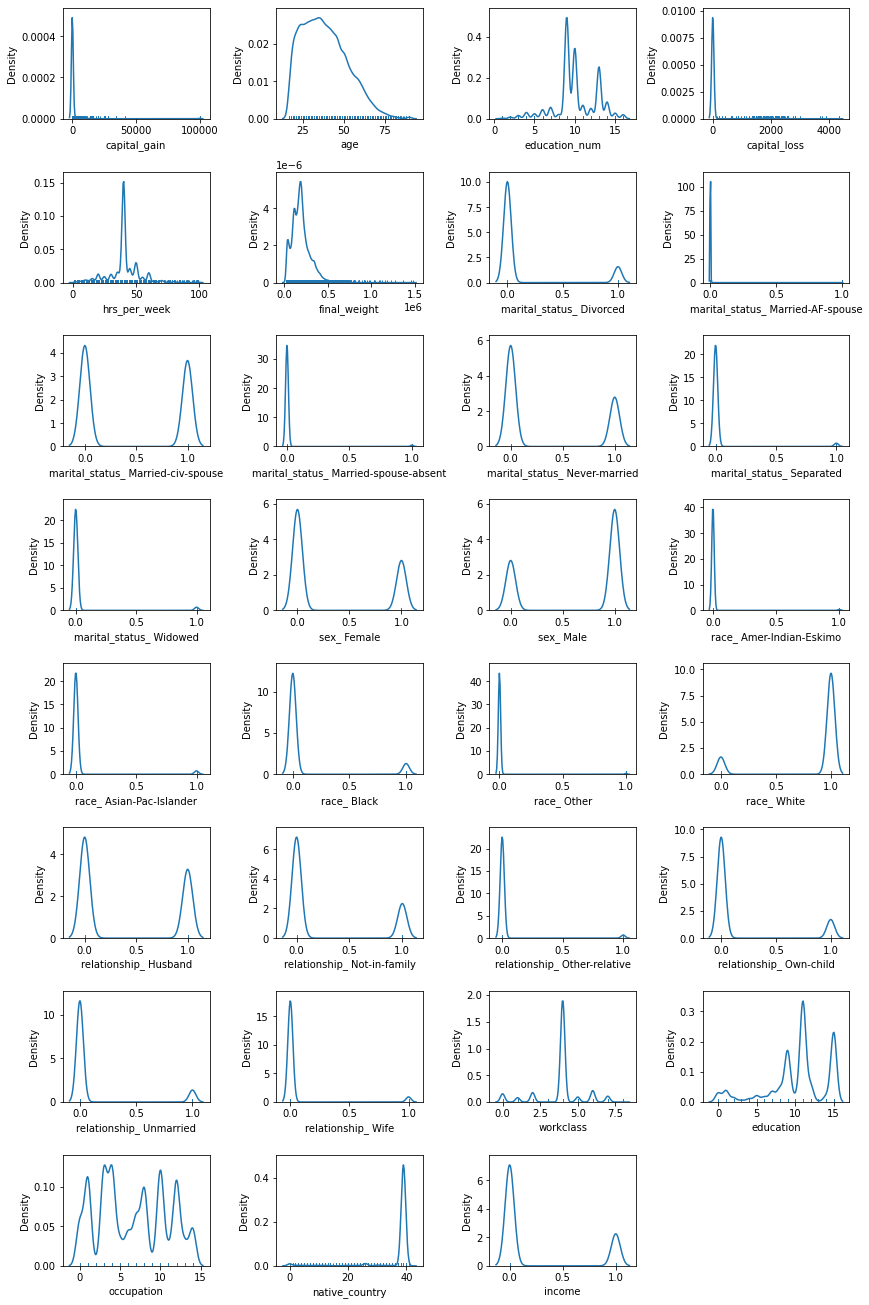

In [238]:
fig = plt.figure(figsize=(12,36))
for i in range(len(df_aux.columns)):
    fig.add_subplot(16,4,i+1)
    sns.distplot(df_aux.iloc[:,i].dropna(), rug=True, hist=False, label='UW', kde_kws={'bw':0.1})
    plt.xlabel(df_aux.columns[i])
plt.tight_layout()
plt.show()

# Univariate Analysis


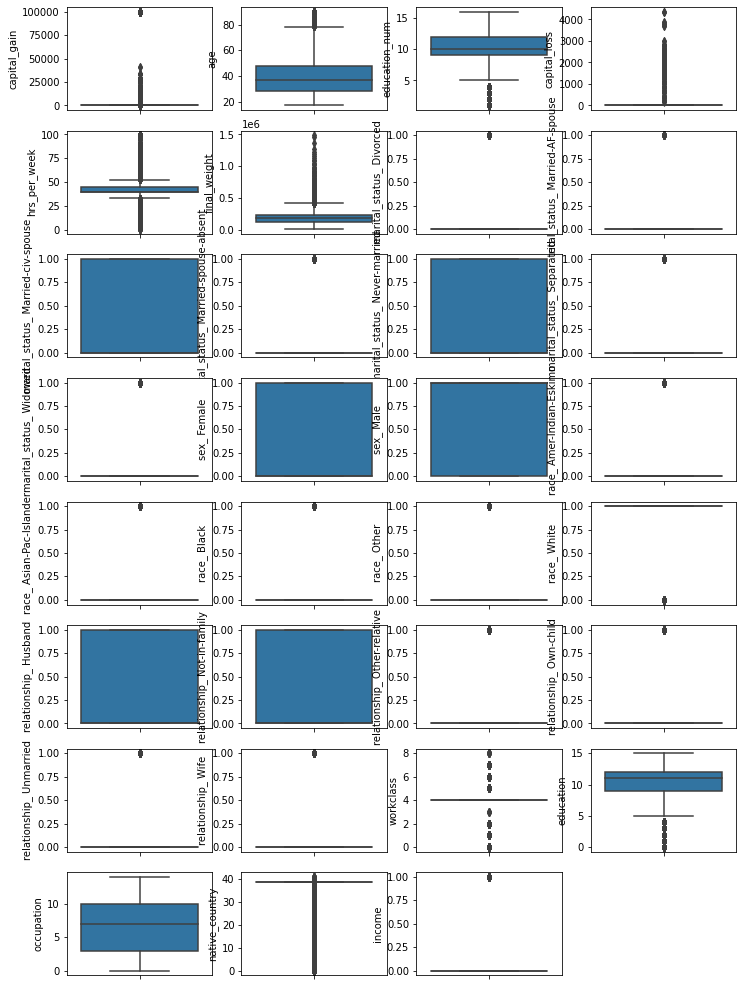

In [239]:
# Univariate Analysis: Box plots

fig = plt.figure(figsize=(12,36))
for i in range(len(df_aux.columns)):
    fig.add_subplot(16,4,i+1)
    sns.boxplot(y=df_aux.iloc[:,i])


# Bivariate Analysis: Bar plots

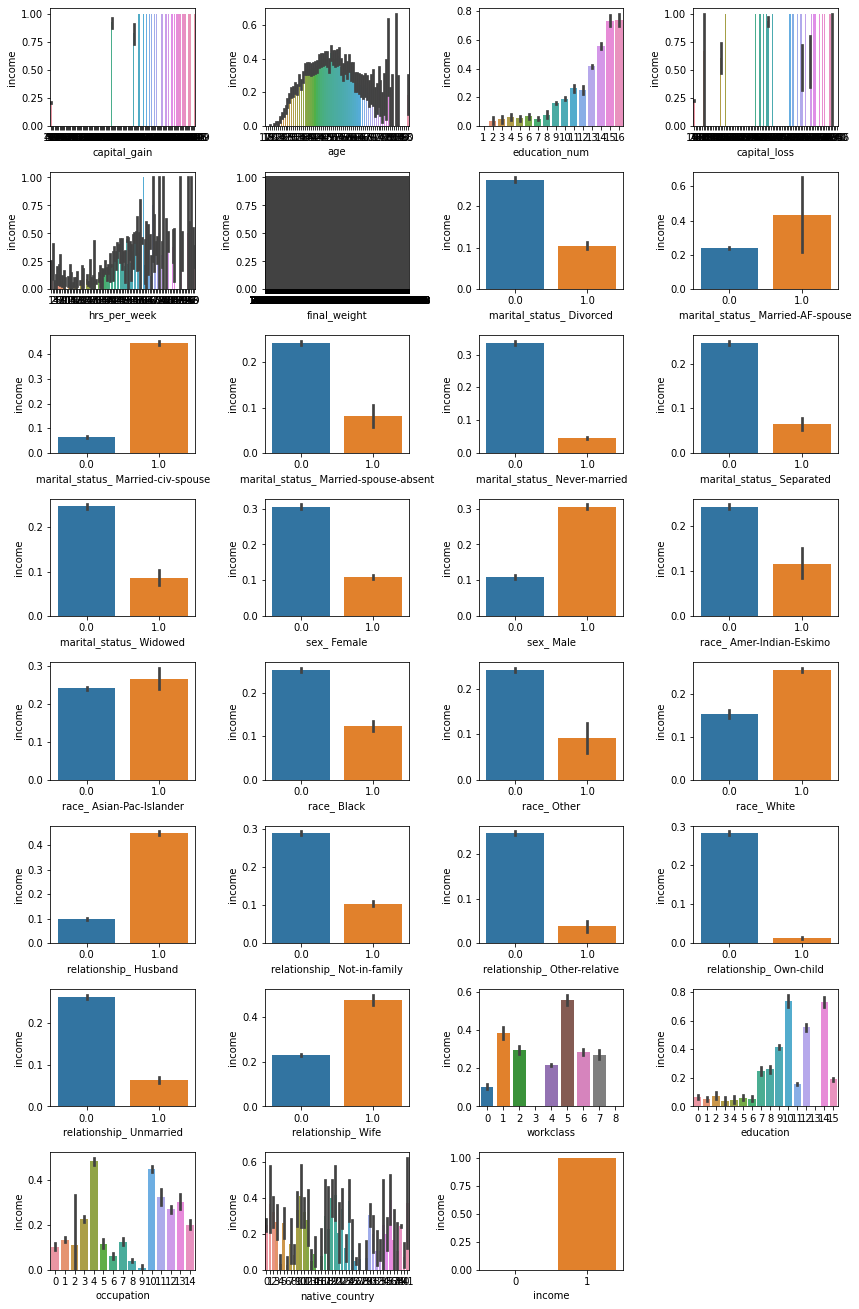

In [240]:
# Bivariate Analysis: Bar plots

fig = plt.figure(figsize=(12,36))
for i in range(len(df_aux.columns)):
    fig.add_subplot(16,4,i+1)
    sns.barplot(x=df_aux.iloc[:,i],y=df_aux['income'])

plt.tight_layout()
plt.show()

# Correlation Analysis

In [212]:
df_corr = df_aux.corr()
index = df_corr.index

<AxesSubplot:>

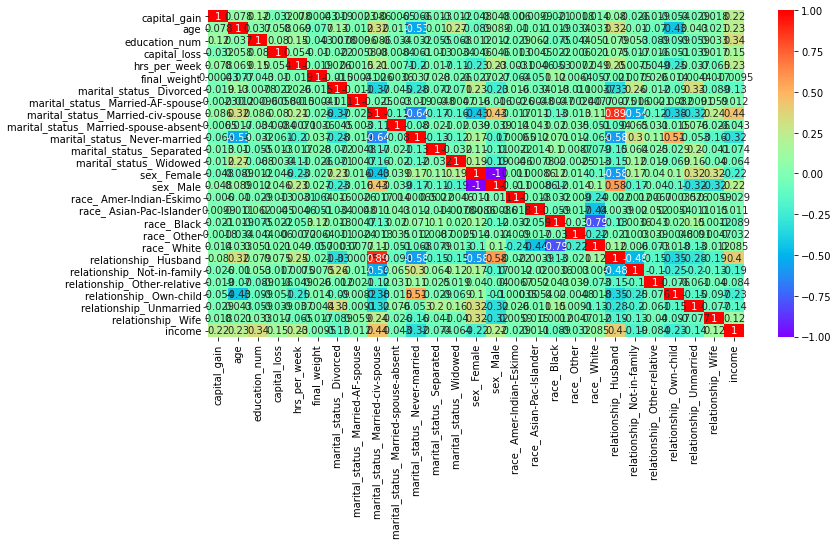

In [214]:
plt.figure(figsize = (12,6))
sns.heatmap(df_aux[index].corr(),annot = True,cmap = 'rainbow')

<AxesSubplot:title={'center':'High Correlation'}>

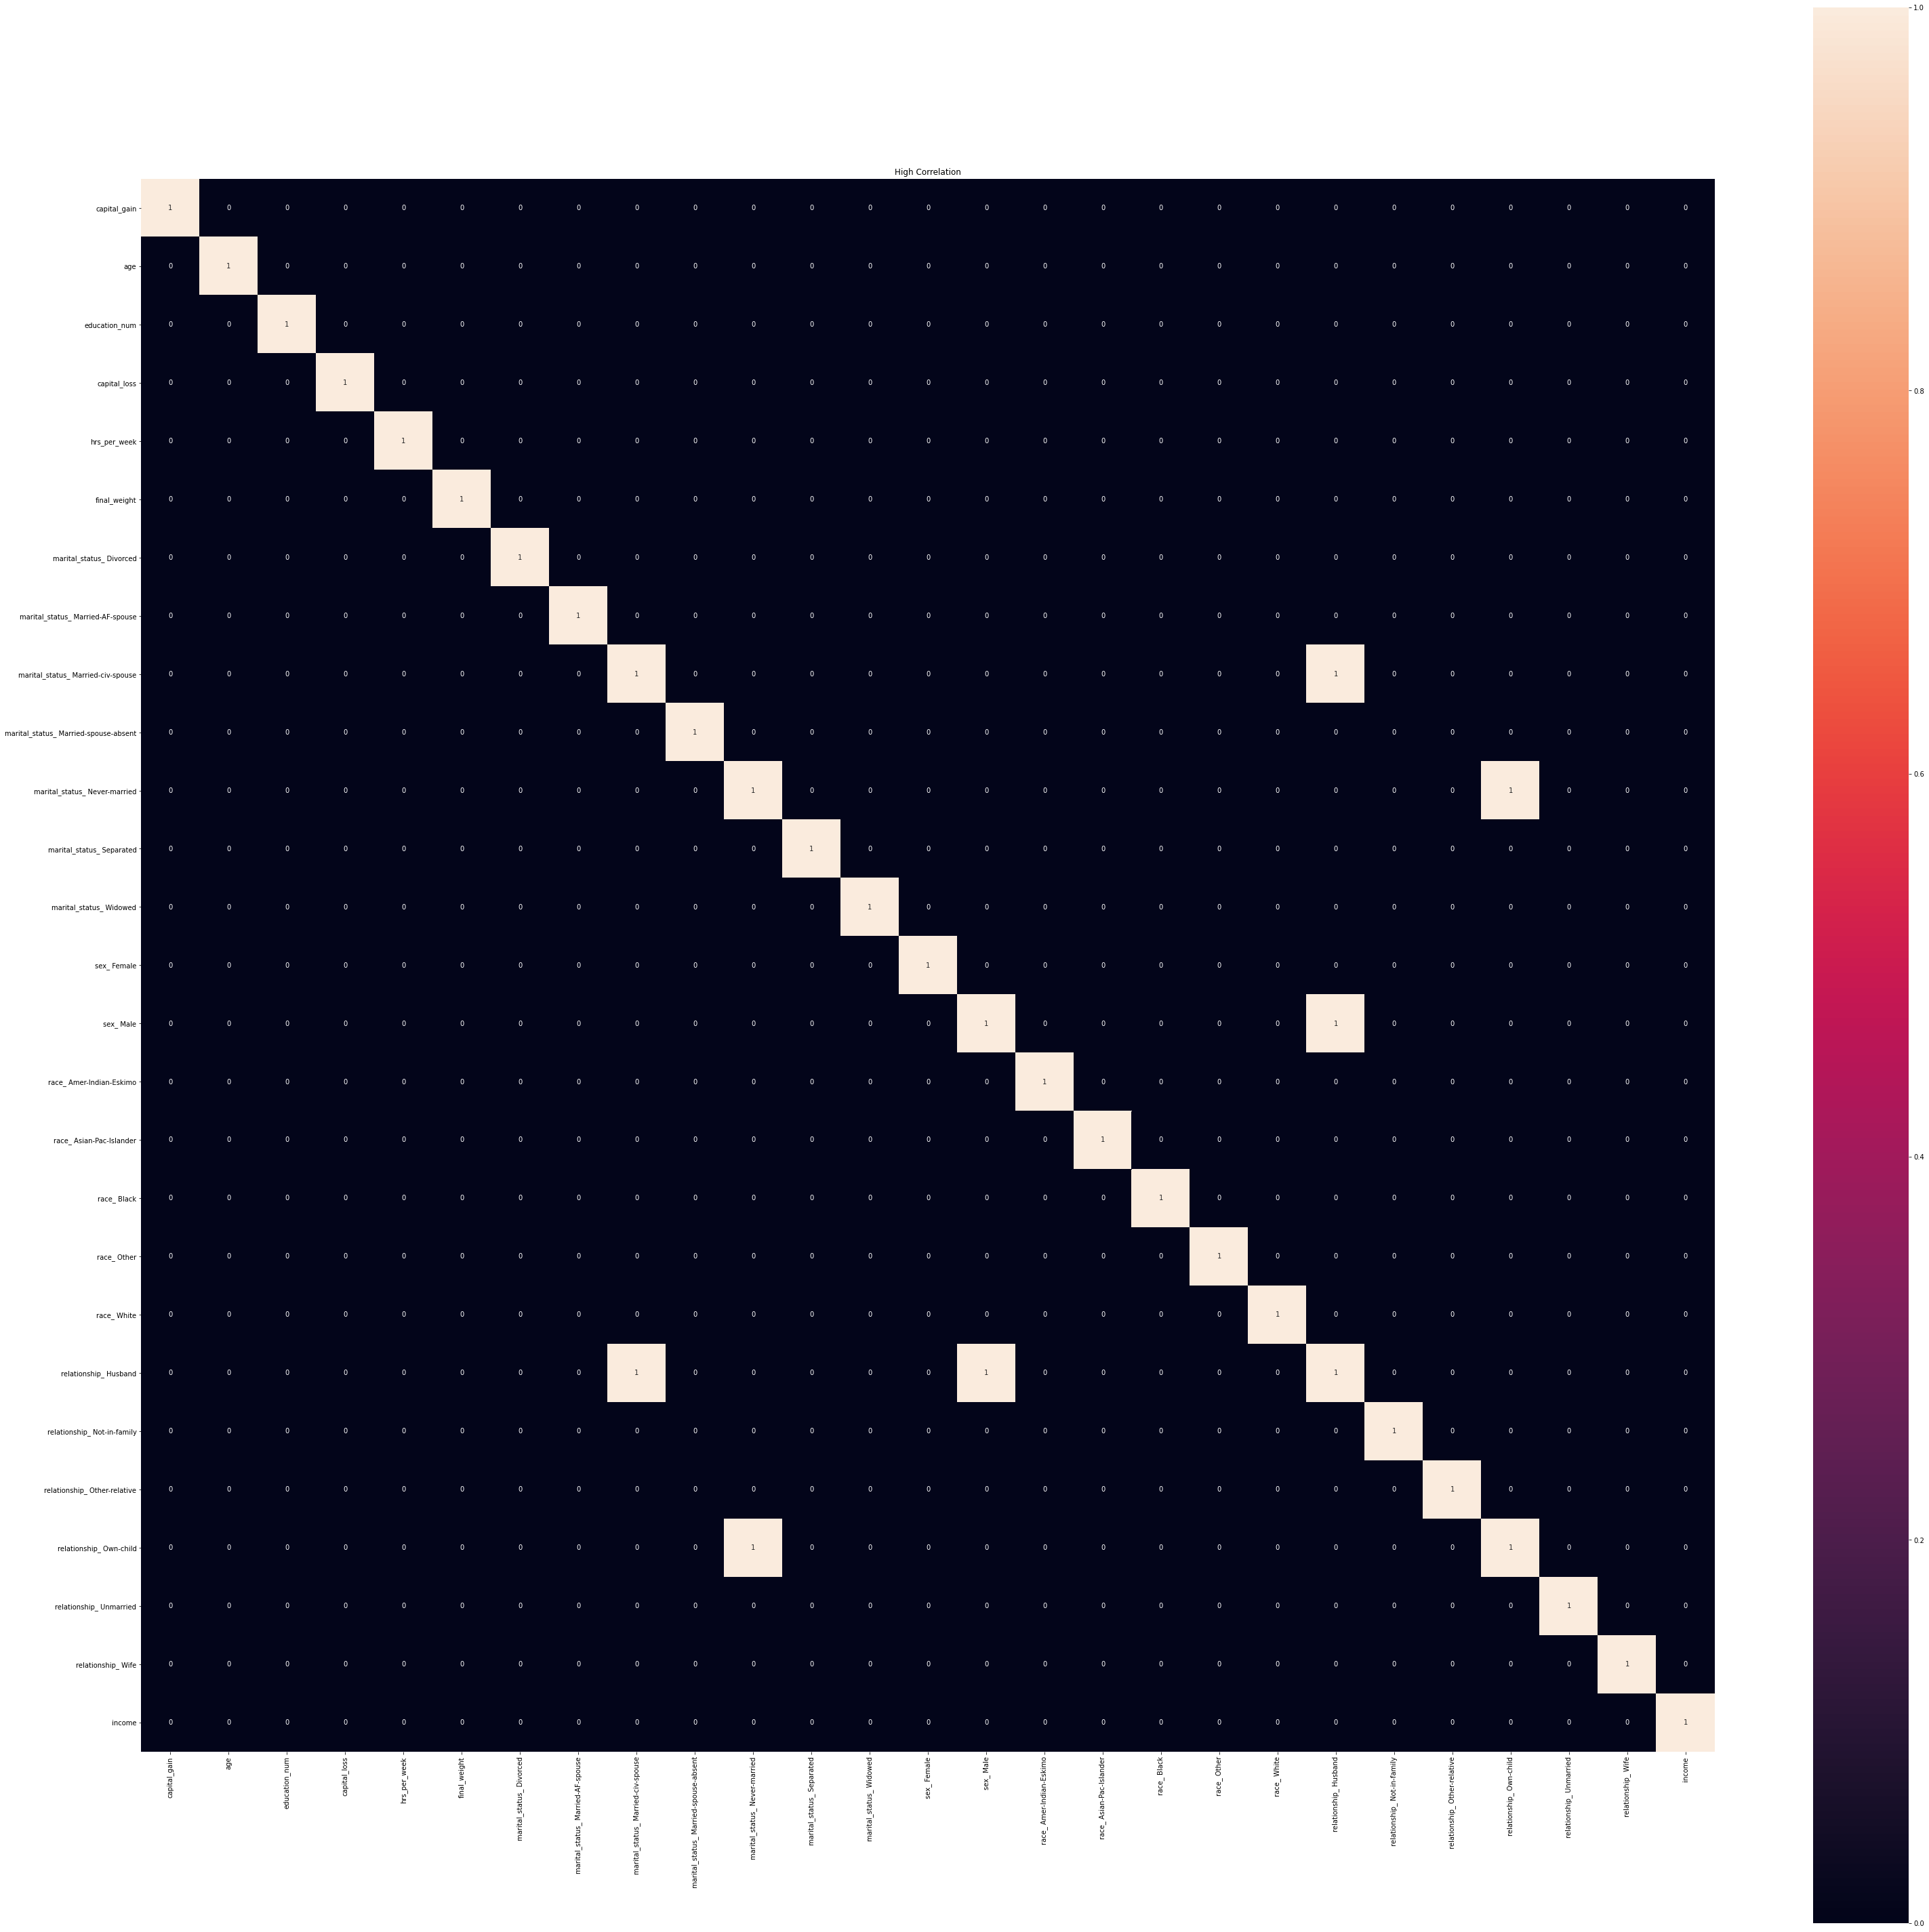

In [242]:
plt.figure(figsize=(52,52))
plt.title('High Correlation')
sns.heatmap(df_corr > 0.5, annot=True, square=True)

In [243]:
corr = df_corr.corr()
cdf = pd.DataFrame(pd.concat([df_corr['income'],corr['income']],\
                             axis='columns'))
cdf.columns = ['corr(x)','corr(corr(x))']
cdf.sort_values(by='corr(corr(x))',axis=0,ascending=False)

,corr(x),corr(corr(x))
income,1.000000,1.000000
marital_status_ Married-civ-spouse,0.444696,0.806236
relationship_ Husband,0.401035,0.776310
sex_ Male,0.215980,0.567381
hrs_per_week,0.229689,0.552871
education_num,0.335154,0.541102
age,0.234037,0.530316
capital_gain,0.223329,0.406696
capital_loss,0.150526,0.290686
race_ White,0.085224,0.275250


# Checking Balance of Data


<AxesSubplot:xlabel='income', ylabel='count'>

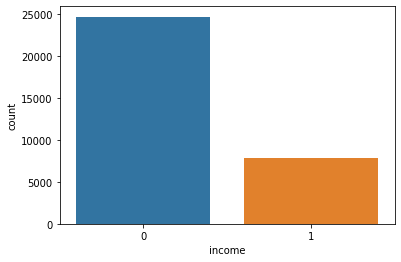

In [244]:
sns.countplot(df_aux["income"])

In [246]:
df_aux['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [46]:
Encoders['OH_enc_']

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [70]:
s[col_OHE]

,race,relationship,marital_status,income,sex
0,White,Not-in-family,Never-married,<=50K,Male


In [47]:
col_OHE

['race', 'relationship', 'marital_status', 'income', 'sex']

In [78]:
d=pd.DataFrame(Encoders['OH_enc_'].transform(s[col_OHE]))

In [79]:
d.columns = Encoders['OH_enc_'].get_feature_names(s[col_OHE].columns.tolist())

In [80]:
d

,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,income_ <=50K,income_ >50K,sex_ Female,sex_ Male
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
